## now on France


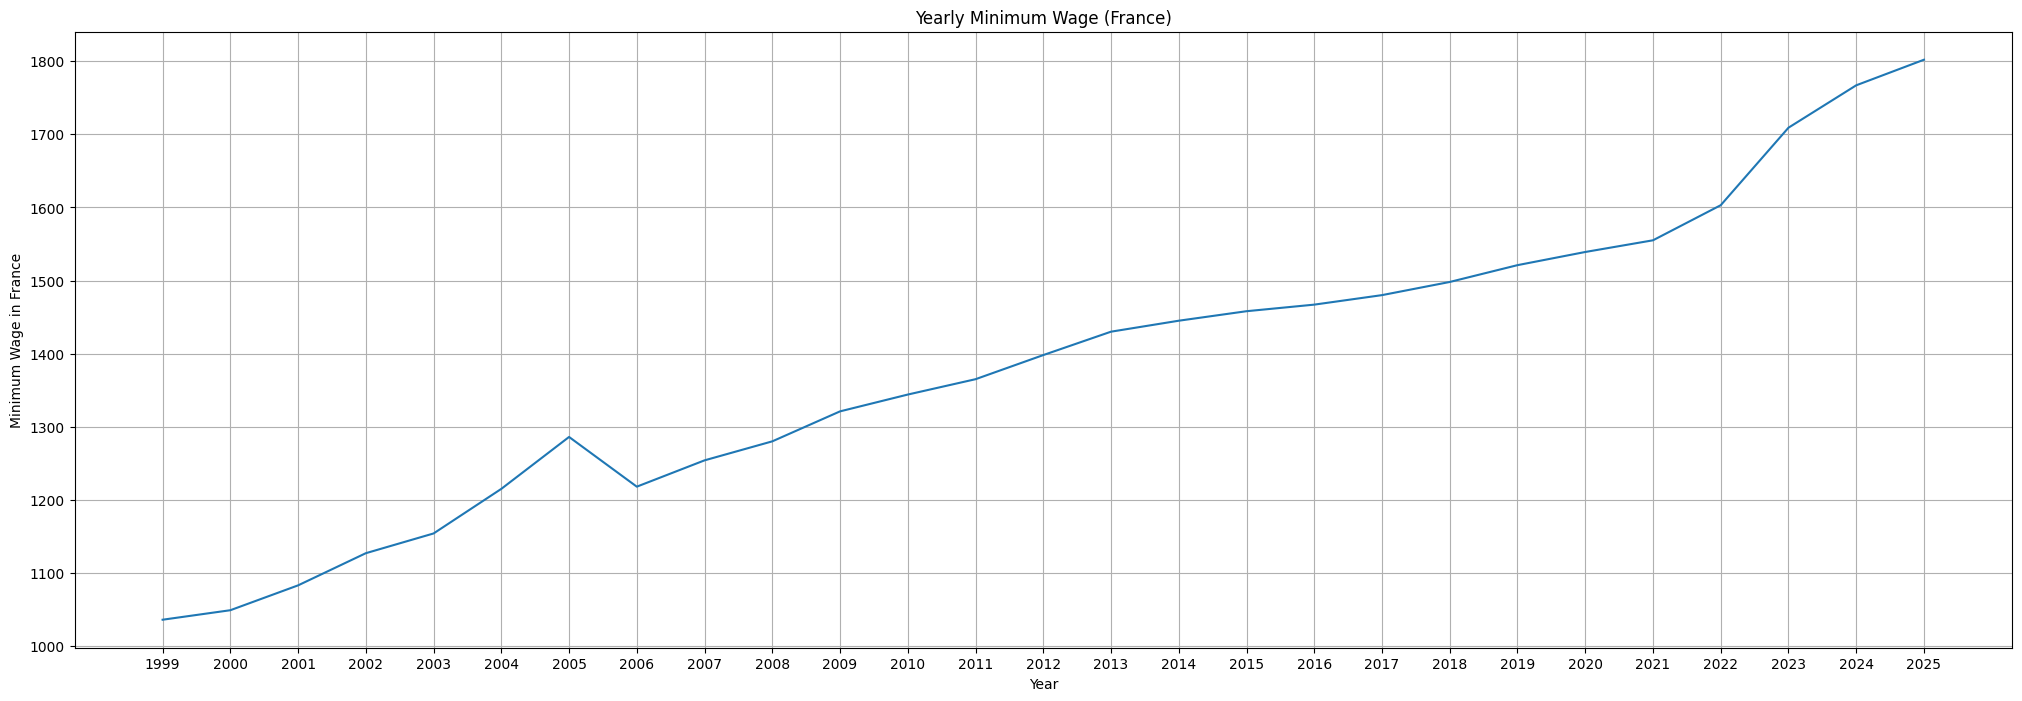

In [2]:
import pandas as pd

minimum_wage = pd.read_csv('earn_mw_cur_linear_2_0.csv')
inflation = pd.read_csv('tec00118_linear_2_0.csv')

import matplotlib.pylab as plt
france_minimum_wage_salaries = minimum_wage[(minimum_wage.geo == 'FR') & (minimum_wage.Currency == 'National currency') & (minimum_wage.TIME_PERIOD.str.endswith('S1'))][['TIME_PERIOD', 'OBS_VALUE']]

france_minimum_wage_salaries.TIME_PERIOD = france_minimum_wage_salaries.TIME_PERIOD.replace(r"-S1$", "", regex=True)
france_minimum_wage_salaries.TIME_PERIOD = france_minimum_wage_salaries.TIME_PERIOD.astype(int)
plt.figure(figsize=(25, 8))
plt.plot(france_minimum_wage_salaries.TIME_PERIOD, france_minimum_wage_salaries.OBS_VALUE)
plt.xlabel("Year")
plt.ylabel("Minimum Wage in France")
plt.title("Yearly Minimum Wage (France)")
plt.xticks(france_minimum_wage_salaries.TIME_PERIOD)
plt.grid()

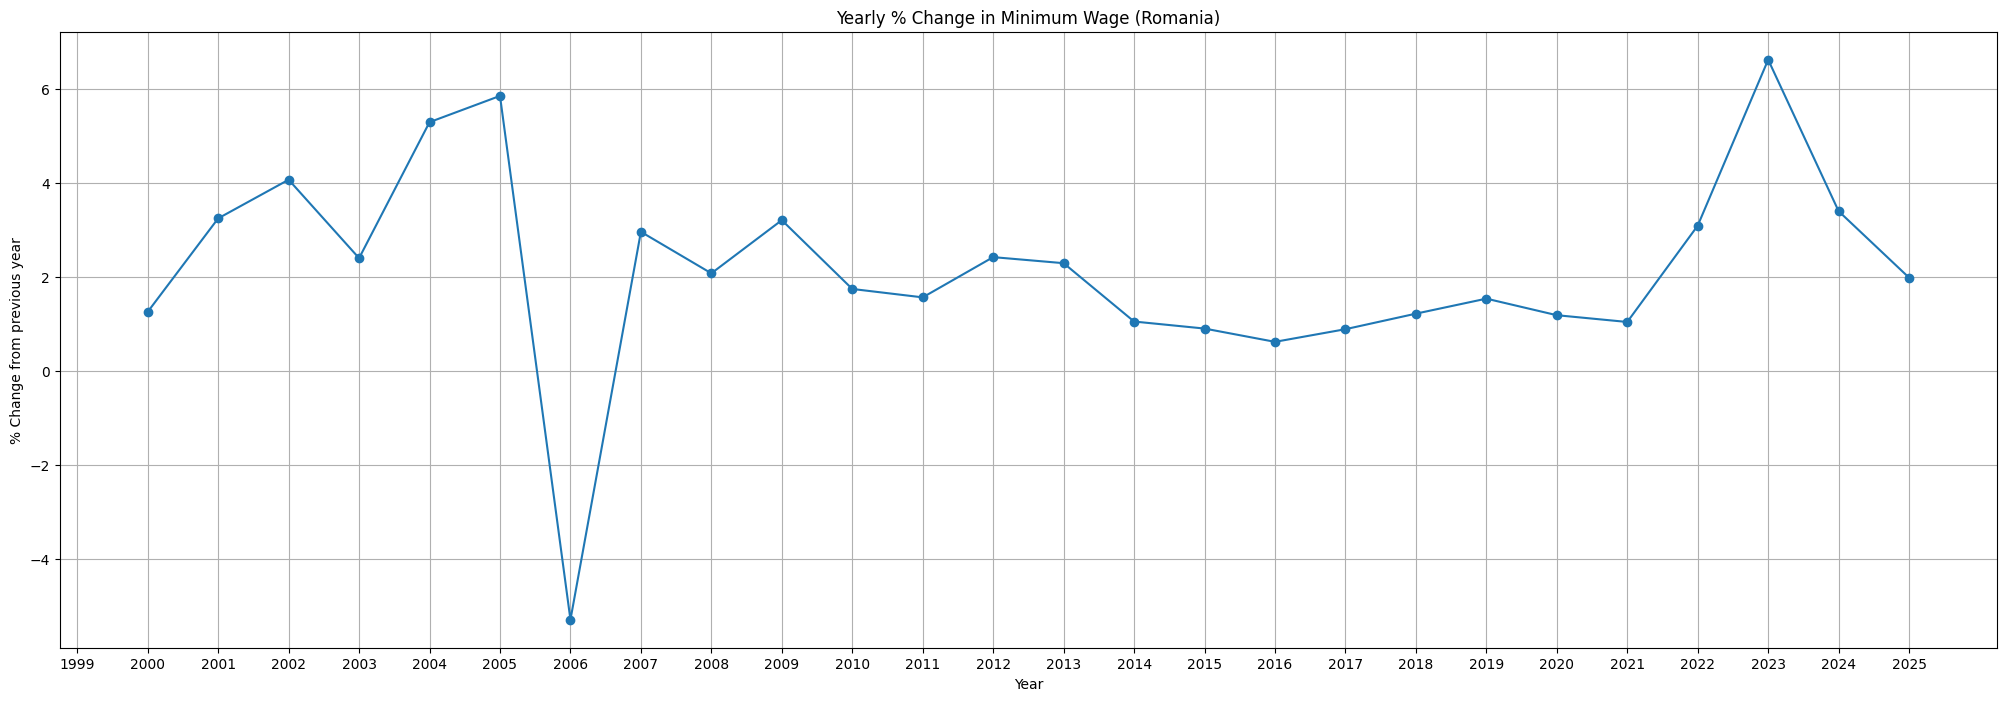

In [3]:
france_minimum_wage_salaries["pct_change"] = france_minimum_wage_salaries.OBS_VALUE.pct_change() * 100
plt.figure(figsize=(25, 8))
plt.plot(
    france_minimum_wage_salaries["TIME_PERIOD"],
    france_minimum_wage_salaries["pct_change"],
    marker="o"
)
plt.xlabel("Year")
plt.ylabel("% Change from previous year")
plt.title("Yearly % Change in Minimum Wage (Romania)")
plt.xticks(france_minimum_wage_salaries.TIME_PERIOD)
plt.grid()

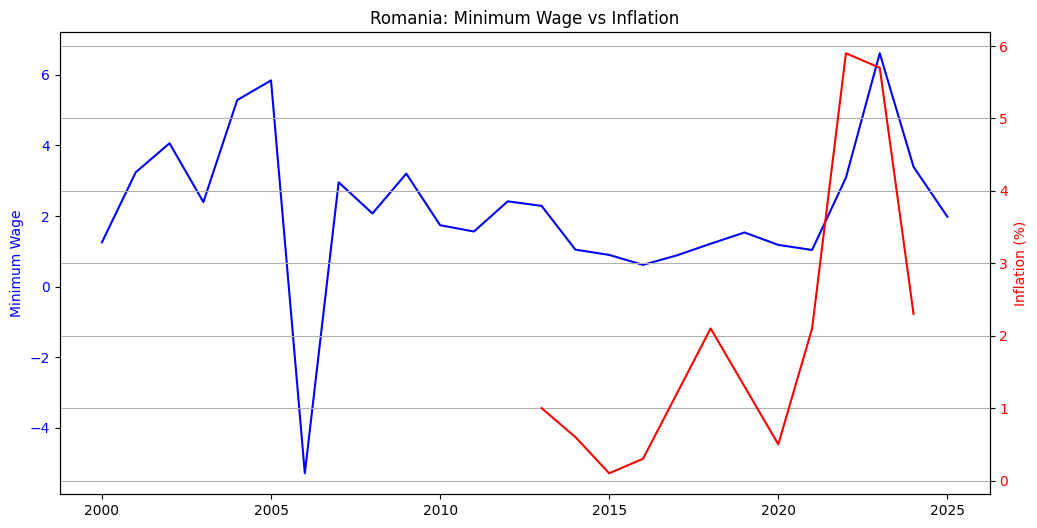

In [4]:
inflation_france = inflation[inflation.geo == 'FR'][['TIME_PERIOD', 'OBS_VALUE']]
df = france_minimum_wage_salaries.merge(
    inflation_france,
    on="TIME_PERIOD",
    how="left",  # keeps all years from wages, NaN for missing inflation
    suffixes=("_wage", "_inflation")
)

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(df["TIME_PERIOD"], df["pct_change"], color="blue", label="Minimum Wage")
ax1.set_ylabel("Minimum Wage", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(df["TIME_PERIOD"], df["OBS_VALUE_inflation"], color="red", label="Inflation")
ax2.set_ylabel("Inflation (%)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Romania: Minimum Wage vs Inflation")
plt.grid()
plt.show()

### let's compare frances Salary Chage to romania

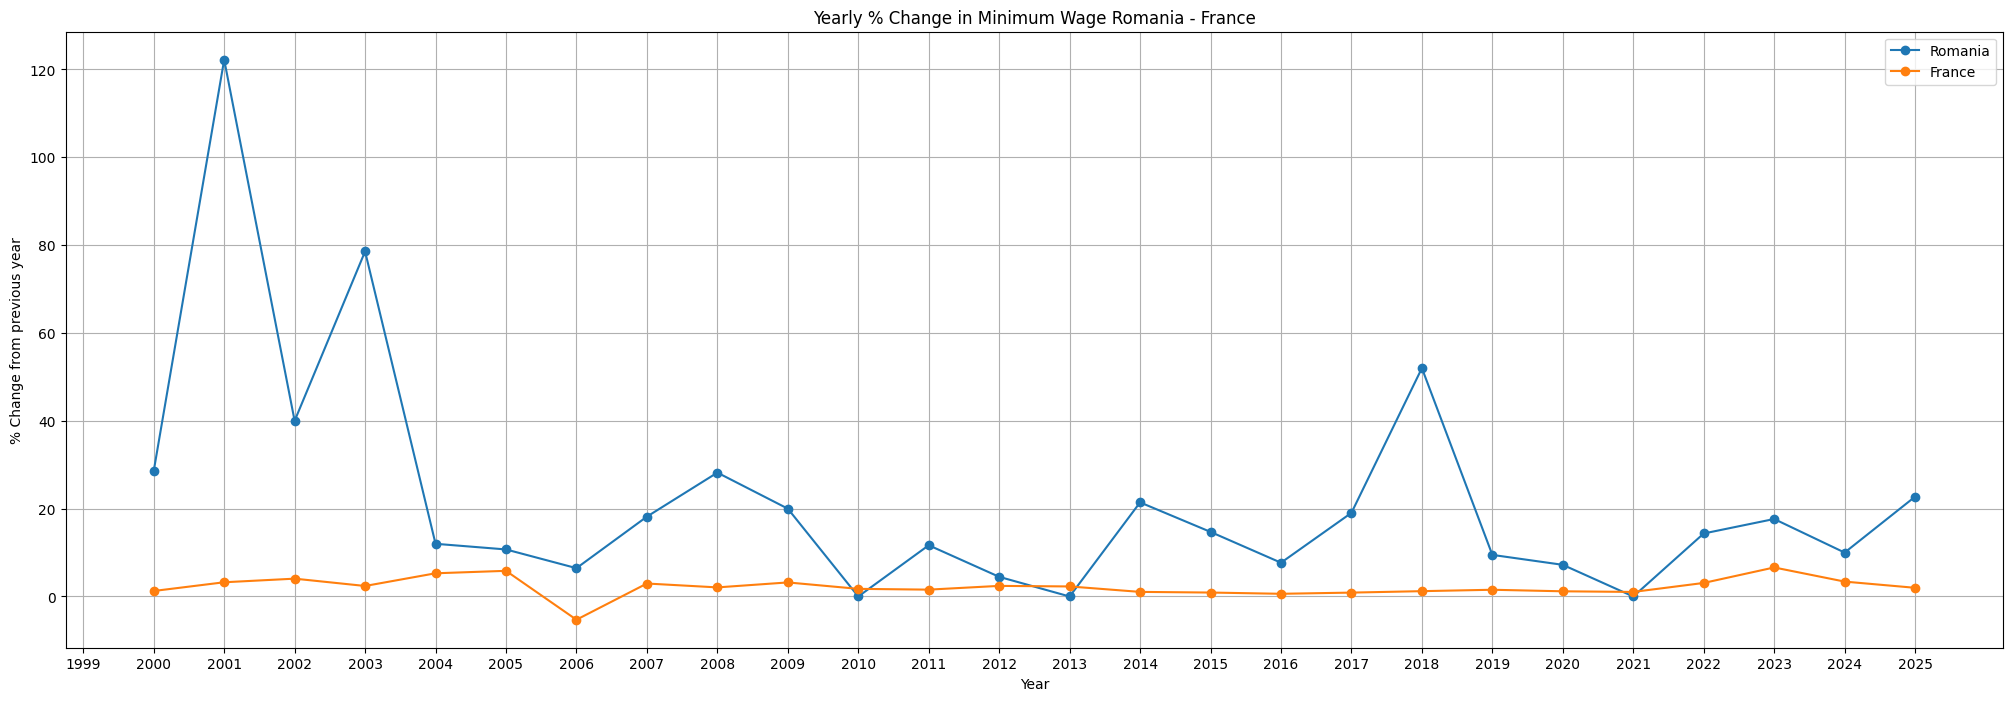

In [ ]:
romania_minimum_wage_salaries = minimum_wage[(minimum_wage.geo == 'RO') & (minimum_wage.Currency == 'National currency') & (minimum_wage.TIME_PERIOD.str.endswith('S1'))][['TIME_PERIOD', 'OBS_VALUE']]

romania_minimum_wage_salaries.TIME_PERIOD = romania_minimum_wage_salaries.TIME_PERIOD.replace(r"-S1$", "", regex=True)
romania_minimum_wage_salaries.TIME_PERIOD = romania_minimum_wage_salaries.TIME_PERIOD.astype(int)
romania_minimum_wage_salaries["pct_change"] = romania_minimum_wage_salaries.OBS_VALUE.pct_change() * 100

plt.figure(figsize=(25, 8))

plt.plot(
    romania_minimum_wage_salaries["TIME_PERIOD"],
    romania_minimum_wage_salaries["pct_change"],
    marker="o",
    label='Romania'
)

plt.plot(
    france_minimum_wage_salaries["TIME_PERIOD"],
    france_minimum_wage_salaries["pct_change"],
    marker="o",
    label='France'
)

plt.xlabel("Year")
plt.ylabel("% Change from previous year")
plt.title("Yearly % Change in Minimum Wage Romania - France")
plt.xticks(romania_minimum_wage_salaries.TIME_PERIOD)
plt.legend()
plt.grid()